# RQ1: Does frequency affect performance?

This notebook focuses on analysing how performance of a franchise is affected as the frequency of release changes.\
We will begin by attempting to define frequency.\
As an added investigation, we would also like to explore if we can define regularity of release and observe how that effects performance.

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)

Import dataframe where data is grouped by franchise

In [3]:
df = pd.read_csv("final_dataframes\\df_franchise_grouped.csv", index_col = 0)

In [4]:
df.sample()

,franchise_name,total_running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
f1284,xXx,16,3.0,2002,2017,9.0,1.0,movie,5.133333,4.4,5.8,5.8,5.2,116101.0,71859.0,182400.0,2005,20.0,7.5,-44178.0,-0.3,0.0,-1.4,2005,20.0,5.8,5.2


Here we define frequency as the number of releases in the franchise divided by the total number of years from the first to last releases in the franchises. 

In [5]:
df["frequency_of_release"] = df.apply(lambda row: row["releases_in_franchise"] / row["total_running_length_years"], axis = 1)

## Distributing the Data

We perform a few initial explorations of the data with this new variable, trying to achieve an understanding of how it is distributed

In [6]:
df[df['content_type']== 'game'].frequency_of_release.describe()

count    1166.000000
mean        0.614016
std         0.506370
min         0.069767
25%         0.305184
50%         0.500000
75%         0.750000
max         5.000000
Name: frequency_of_release, dtype: float64

In [7]:
df[df['content_type']== 'movie'].frequency_of_release.describe()

count    845.000000
mean       0.833950
std        1.078453
min        0.040000
25%        0.285714
50%        0.500000
75%        1.000000
max       10.333333
Name: frequency_of_release, dtype: float64

We separate the dataframes here to avoid constant masking as we analyse the 2 mediums individually

We've also add a minimum threshold for the number of releases and number of years in a franchise here. This is to filter out any franchises with less that x amount of releases or released all their content in a short space of time. We added this because we feel that franchises with 3 releases for example, can't add to the data in any useful way.
Frequency in this analysis is measured in an attempt to spot a trend in a franchise and we don't think franchises below the threshold are big enough to have established any significant trend.

In [39]:
game_df = df[(df['content_type'] == 'game') & (df['releases_in_franchise'] > 5) & (df['total_running_length_years'] > 5)]
movie_df = df[(df['content_type'] == 'movie') & (df['releases_in_franchise'] > 5) & (df['total_running_length_years'] > 5)]

We also added font sizes for any graphs displayed below

In [40]:
plot_title_size = 30
subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15

Here we spend a bit of time trying to decide how we would like to group the various frequencies in a way that compliments the data. The raw format tails off in such a way that any results would not be very reliable due to low numbers of samples.

<AxesSubplot:xlabel='frequency_of_release'>

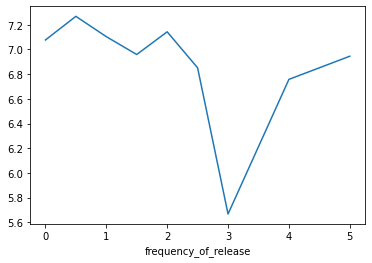

In [41]:
game_df.groupby(game_df["frequency_of_release"]//0.5*0.5)["average_rating"].mean().plot()

In [42]:
game_df.groupby(game_df['frequency_of_release'] // 0.5 * 0.5)['average_rating'].mean()

frequency_of_release
0.0    7.076712
0.5    7.268454
1.0    7.103904
1.5    6.959139
2.0    7.143075
2.5    6.851269
3.0    5.666537
4.0    6.757640
5.0    6.945197
Name: average_rating, dtype: float64

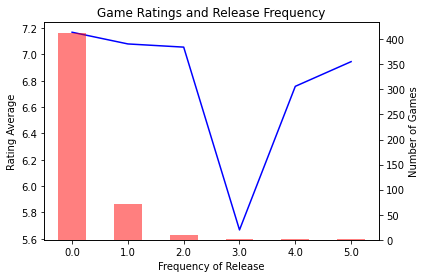

In [43]:
fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby(game_df['frequency_of_release'] // 1 * 1)['average_rating'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by frequency of release
ax2 = ax1.twinx()
game_df.groupby(game_df['frequency_of_release'] // 1 * 1)['average_rating'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Games')

# set the title
plt.title('Game Ratings and Release Frequency')

# show the plot
plt.show()

C:\Users\35387\AppData\Local\Temp\ipykernel_36072\1848687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


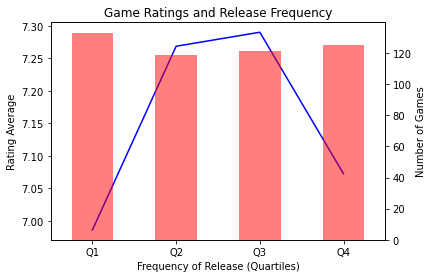

In [44]:
game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby('freq_quartile')['average_rating'].mean(), color='blue')
ax1.set_xlabel('Frequency of Release (Quartiles)')
ax1.set_ylabel('Rating Average')

# create a bar plot of the count of games by quartiles of frequency of release
ax2 = ax1.twinx()
game_df.groupby('freq_quartile')['average_rating'].count().plot(kind='bar', ax=ax2, alpha=0.5, color='red')
ax2.set_ylabel('Number of Games')

# set the title
plt.title('Game Ratings and Release Frequency')

# show the plot
plt.show()

In [45]:
game_df.groupby('freq_quartile')['frequency_of_release'].mean()

freq_quartile
Q1    0.295940
Q2    0.456589
Q3    0.674755
Q4    1.279015
Name: frequency_of_release, dtype: float64

In [46]:
game_df.groupby('freq_quartile')['frequency_of_release'].min()

freq_quartile
Q1    0.157895
Q2    0.380952
Q3    0.540541
Q4    0.807692
Name: frequency_of_release, dtype: float64

In [47]:
game_df.groupby('freq_quartile')['frequency_of_release'].max()

freq_quartile
Q1    0.375000
Q2    0.538462
Q3    0.800000
Q4    5.000000
Name: frequency_of_release, dtype: float64

## Games Frequency

We decide to use quartiles because we believe it encompasses what the data represents while also even distributing it somewhat evenly.
See the freq_labels below for the rough distribution of the frequency bins.

In [48]:
freq_labels=['4+ Years', '2 to 4 Years', '1 to 2 Years', 'More than 1 a Year']

C:\Users\35387\AppData\Local\Temp\ipykernel_36072\3418980315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=freq_labels)


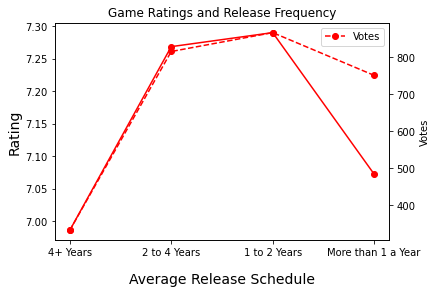

In [49]:
game_df['freq_quartile'] = pd.qcut(game_df['frequency_of_release'], q=4, labels=freq_labels)

fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby('freq_quartile')['average_rating'].mean(), color='red', marker = 'o')
ax1.set_xlabel('Average Release Schedule', fontsize=14)
ax1.set_ylabel('Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(game_df.groupby('freq_quartile')['average_votes'].mean(), color='red', marker = 'o', linestyle='--')
ax2.set_ylabel('Votes')

# set the title
plt.title('Game Ratings and Release Frequency')#
ax1.xaxis.set_label_coords(0.5, -0.15)
plt.legend(labels = ["Votes", "Rating"])
# show the plot
plt.show()

## Movies Frequency

C:\Users\35387\AppData\Local\Temp\ipykernel_36072\3341515950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4, labels=freq_labels)


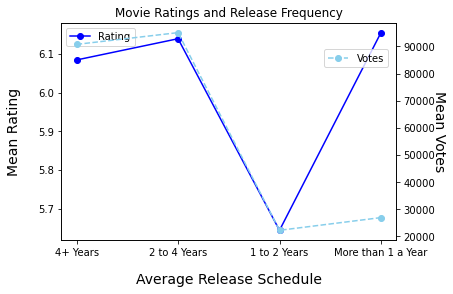

In [54]:
movie_df['freq_quartile'] = pd.qcut(movie_df['frequency_of_release'], q=4, labels=freq_labels)

fig, ax1 = plt.subplots()
ax1.plot(movie_df.groupby('freq_quartile')['average_rating'].mean(), color='blue', marker = 'o', label = "Rating")
ax1.set_xlabel('Average Release Schedule', fontsize=14)
ax1.set_ylabel('Mean Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(movie_df.groupby('freq_quartile')['average_votes'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=14, rotation = 270)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax1.legend()
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.9))

# show the plot
plt.show()

# Regularity

We ended up using "release_gap_range" to measure regularity. This value shows us the difference between the largest and smallest gaps between movies. The lower the number is, the more consistent the movie release is. If a number is higher, this means that there was a small gap between at least one release and a large gap for at least one other. This shows an inconsistency in release schedule.

In [38]:
movie_df.sample()

,franchise_name,total_running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop,frequency_of_release,freq_quartile,regularity_category
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f238,Starship Troopers,21,3.0,1997,2017,10.0,1.0,movie,6.2,5.5,7.3,6.55,NaN,106888.333333,6067.0,303029.0,2017,100.0,10.0,-148481.0,-0.9,0.0,-1.5,2012,75.0,7.3,5.5,0.142857,4+ Years,No Consistency


In [57]:
movie_df["release_gap_range"].describe()

count    184.000000
mean       6.847826
std        7.920969
min        0.000000
25%        1.750000
50%        4.000000
75%       10.000000
max       46.000000
Name: release_gap_range, dtype: float64

In [79]:
movie_df['release_gap_range'].value_counts()

1.0     28
2.0     20
3.0     20
0.0     18
4.0     11
5.0     11
6.0     11
11.0     8
8.0      7
7.0      6
13.0     5
10.0     5
9.0      5
14.0     4
18.0     3
15.0     3
16.0     3
21.0     3
28.0     2
20.0     2
23.0     2
22.0     1
17.0     1
42.0     1
12.0     1
41.0     1
33.0     1
46.0     1
Name: release_gap_range, dtype: int64

In [68]:
conditions = [
    movie_df['release_gap_range'] < 2,              # consistent release (once every x amount of years)
    movie_df['release_gap_range'].between(2, 5),    # somewhat consistent (allows for some variation, there might be a couple of years either way)
    movie_df['release_gap_range'] > 5               # no consistency (release time varies wildly)
]
values = ['Consistent', 'Kind of Consistent', 'No Consistency']

# Create the new column based on the conditions
movie_df['regularity_category'] = np.select(conditions, values)

In [69]:
conditions = [
    game_df['release_gap_range'] < 2,              # consistent release (once every x amount of years) 
    game_df['release_gap_range'].between(2, 5),    # somewhat consistent (allows for some variation, there might be a couple of years either way)
    game_df['release_gap_range'] > 5               # no consistency (release time varies wildly)
]
values = ['Consistent', 'Kind of Consistent', 'No Consistency']

# Create the new column based on the conditions
game_df['regularity_category'] = np.select(conditions, values)

In [70]:
movie_df['regularity_category'].value_counts()

No Consistency        76
Kind of Consistent    62
Consistent            46
Name: regularity_category, dtype: int64

In [71]:
movie_df[movie_df['regularity_category']== 1]

,franchise_name,total_running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop,frequency_of_release,freq_quartile,regularity_category
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


This removes any row where the regularity category is NA

In [72]:
game_df = game_df[~(game_df['regularity_category'] == "0")]
movie_df = movie_df[~(movie_df['regularity_category'] == "0")]

Here we observe the how our segments are populated

<AxesSubplot:>

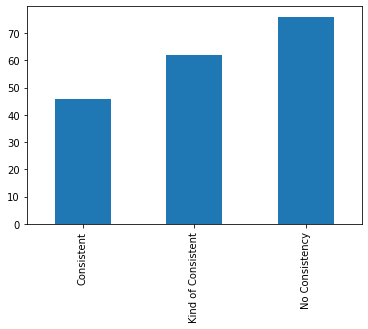

In [73]:
category_counts = movie_df['regularity_category'].value_counts()
category_counts = category_counts.sort_index()
category_counts.plot(kind='bar')

<AxesSubplot:>

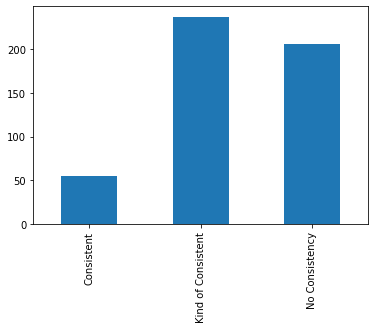

In [74]:
category_counts = game_df['regularity_category'].value_counts()
category_counts = category_counts.sort_index()
category_counts.plot(kind='bar')

Now we observe how the rating and votes have been affected by the regularity of release

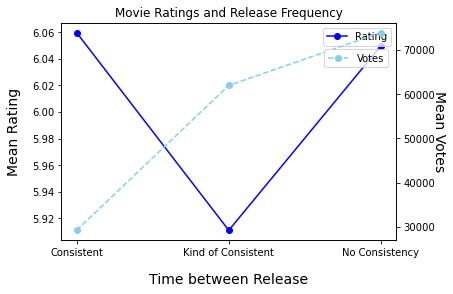

In [75]:
movie_df['regularity_category'] = pd.Categorical(movie_df['regularity_category'], categories=values, ordered=True)

fig, ax1 = plt.subplots()
ax1.plot(movie_df.groupby('regularity_category')['average_rating'].mean(), color='blue', marker = 'o', label = "Rating")
ax1.set_xlabel('Time between Release', fontsize=14)
ax1.set_ylabel('Mean Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(movie_df.groupby('regularity_category')['average_votes'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=14, rotation = 270)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax1.legend()
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.9))

# show the plot
plt.show()

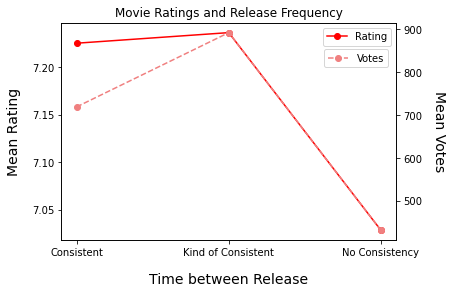

In [76]:
game_df['regularity_category'] = pd.Categorical(game_df['regularity_category'], categories=values, ordered=True)
fig, ax1 = plt.subplots()
ax1.plot(game_df.groupby('regularity_category')['average_rating'].mean(), color='red', marker = 'o', label = "Rating")
ax1.set_xlabel('Time between Release', fontsize=14)
ax1.set_ylabel('Mean Rating', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(game_df.groupby('regularity_category')['average_votes'].mean(), color='lightcoral', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=14, rotation = 270)

# set the title
plt.title('Movie Ratings and Release Frequency')
ax1.xaxis.set_label_coords(0.5, -0.15)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax1.legend()
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.9))

# show the plot
plt.show()

## Final Graph

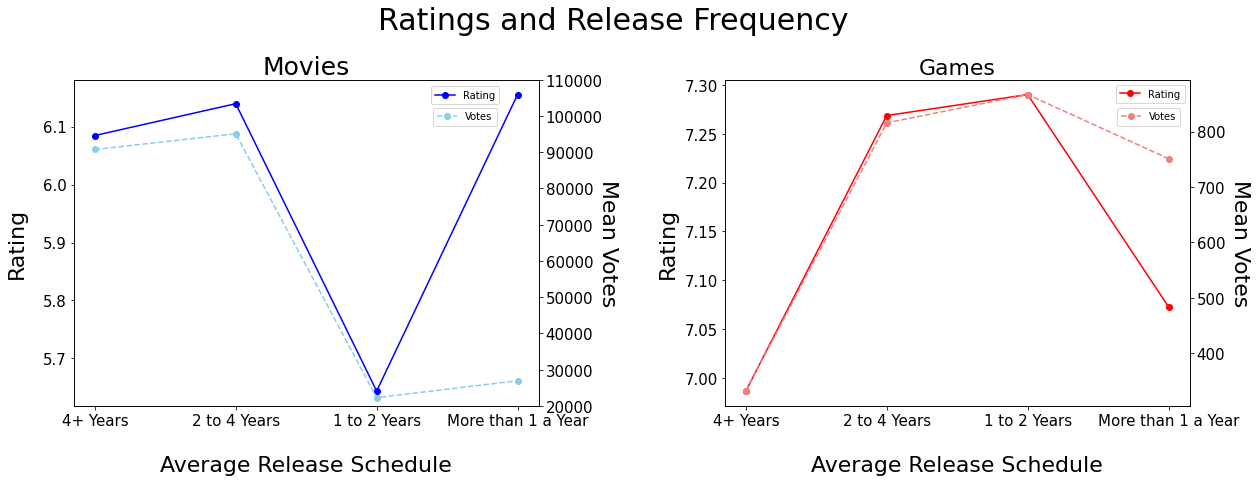

In [112]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

axs[0].plot(movie_df.groupby('freq_quartile')['average_rating'].mean(), color='blue', marker = 'o', label = "Rating")
axs[0].set_xlabel('Average Release Schedule', fontsize=axis_label_size)
axs[0].set_ylabel('Rating', fontsize=axis_label_size)

ax2 = axs[0].twinx()
ax2.plot(movie_df.groupby('freq_quartile')['average_votes'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=axis_label_size, rotation = 270)

# set the title
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].xaxis.set_label_coords(0.5, -0.1)

axs[1].plot(game_df.groupby('freq_quartile')['average_rating'].mean(), color='red', marker = 'o', label = "Rating")
axs[1].set_xlabel('Average Release Schedule', fontsize=axis_label_size)
axs[1].set_ylabel('Rating', fontsize=axis_label_size)

#adjust ylim on ax2
ax2.set_ylim(20000,110000)

ax3 = axs[1].twinx()
ax3.plot(game_df.groupby('freq_quartile')['average_votes'].mean(), color='lightcoral', marker = 'o', linestyle='--', label = "Votes")
ax3.set_ylabel('Mean Votes', fontsize=axis_label_size, rotation = 270)

axs[1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_size)
ax2.tick_params(axis='y', which='major', labelsize=tick_label_size)
ax3.tick_params(axis='y', which='major', labelsize=tick_label_size)

axs[0].xaxis.set_label_coords(0.5, -0.15)
axs[0].yaxis.set_label_coords(-0.1, 0.5)

ax2.yaxis.set_label_coords(1.17, 0.5)

axs[1].xaxis.set_label_coords(0.5, -0.15)
axs[1].yaxis.set_label_coords(-0.1, 0.5)

ax3.yaxis.set_label_coords(1.13, 0.5)
# set the title
axs[1].set_title('Games', fontsize = axis_label_size)

axs[0].legend(loc='upper right', bbox_to_anchor=(0.925, 0.995))
ax2.legend(loc='upper right', bbox_to_anchor=(0.92, 0.93))

axs[1].legend()
ax3.legend(loc='upper right', bbox_to_anchor=(0.99, 0.93))


plt.subplots_adjust(wspace=0.4)
fig.suptitle('Ratings and Release Frequency', fontsize = plot_title_size, y = 1.05)

fig.savefig("RQ1_Freq.png", facecolor='white', bbox_inches='tight')

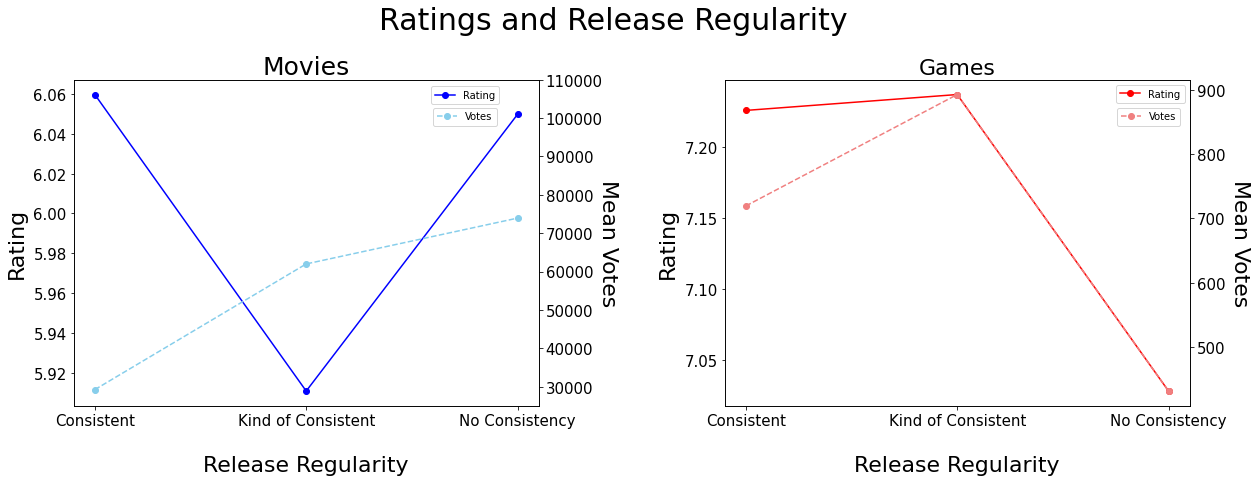

In [108]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

axs[0].plot(movie_df.groupby('regularity_category')['average_rating'].mean(), color='blue', marker = 'o', label = "Rating")
axs[0].set_xlabel('Release Regularity', fontsize=axis_label_size)
axs[0].set_ylabel('Rating', fontsize=axis_label_size)

ax2 = axs[0].twinx()
ax2.plot(movie_df.groupby('regularity_category')['average_votes'].mean(), color='skyblue', marker = 'o', linestyle='--', label = "Votes")
ax2.set_ylabel('Mean Votes', fontsize=axis_label_size, rotation = 270)

# set the title
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].xaxis.set_label_coords(0.5, -0.1)

axs[1].plot(game_df.groupby('regularity_category')['average_rating'].mean(), color='red', marker = 'o', label = "Rating")
axs[1].set_xlabel('Release Regularity', fontsize=axis_label_size)
axs[1].set_ylabel('Rating', fontsize=axis_label_size)

#adjust ylim on ax2
ax2.set_ylim(25000,110000)

ax3 = axs[1].twinx()
ax3.plot(game_df.groupby('regularity_category')['average_votes'].mean(), color='lightcoral', marker = 'o', linestyle='--', label = "Votes")
ax3.set_ylabel('Mean Votes', fontsize=axis_label_size, rotation = 270)

axs[1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0].tick_params(axis='both', which='major', labelsize=tick_label_size)
ax2.tick_params(axis='y', which='major', labelsize=tick_label_size)
ax3.tick_params(axis='y', which='major', labelsize=tick_label_size)

axs[0].xaxis.set_label_coords(0.5, -0.15)
axs[0].yaxis.set_label_coords(-0.1, 0.5)

ax2.yaxis.set_label_coords(1.17, 0.5)

axs[1].xaxis.set_label_coords(0.5, -0.15)
axs[1].yaxis.set_label_coords(-0.1, 0.5)

ax3.yaxis.set_label_coords(1.13, 0.5)
# set the title
axs[1].set_title('Games', fontsize = axis_label_size)

axs[0].legend(loc='upper right', bbox_to_anchor=(0.925, 0.995))
ax2.legend(loc='upper right', bbox_to_anchor=(0.92, 0.93))

axs[1].legend()
ax3.legend(loc='upper right', bbox_to_anchor=(0.99, 0.93))


plt.subplots_adjust(wspace=0.4)
fig.suptitle('Ratings and Release Regularity', fontsize = plot_title_size, y = 1.05)

fig.savefig("RQ1_Reg.png", facecolor='white', bbox_inches='tight')

In [98]:
game_df[(game_df["frequency_of_release"] < 1) & (game_df["frequency_of_release"] > 0.5)]

,franchise_name,total_running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop,frequency_of_release,freq_quartile,regularity_category
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3025-10,Tony Hawk,22,15.0,1999,2020,4.0,1.071429,game,6.671429,2.4,8.5,6.869231,8.500,606.607143,17.0,1517.0,2015,76.190476,1.615385,-48.384615,0.053846,0.000000,-4.469231,2015,76.190476,6.875000,8.500000,0.681818,1 to 2 Years,Kind of Consistent
3025-100,Commander Keen,12,8.0,1990,2001,9.0,2.666667,game,6.997222,6.7,7.8,7.185714,NaN,70.305556,31.0,126.0,2001,100.000000,5.500000,-32.833333,-0.083333,-1.000000,-0.485714,2001,100.000000,7.145833,NaN,0.666667,1 to 2 Years,No Consistency
3025-1008,Winx Club,9,6.0,2006,2014,3.0,1.200000,game,7.580000,7.1,8.2,7.550000,8.200,11.700000,5.0,48.0,2012,75.000000,2.000000,-6.125000,0.150000,-0.250000,-0.450000,2012,75.000000,7.533333,8.200000,0.666667,1 to 2 Years,Kind of Consistent
3025-1022,Forgotten Realms,26,25.0,1988,2013,2.0,1.388889,game,7.169444,3.1,9.4,7.582609,6.300,267.916667,6.0,2156.0,2011,92.000000,1.470588,5.823529,-0.058824,0.000000,-4.482609,2011,92.000000,7.478125,6.300000,0.961538,More than 1 a Year,Kind of Consistent
3025-1032,Sim,19,12.0,1991,2009,7.0,1.333333,game,7.288889,6.0,7.9,7.540000,7.200,19.555556,6.0,55.0,1995,22.222222,2.250000,-4.000000,0.031250,-0.125000,-1.540000,1995,22.222222,7.587500,7.312500,0.631579,1 to 2 Years,No Consistency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025-93,Civilization,26,17.0,1991,2016,3.0,1.307692,game,7.980769,6.1,8.9,8.118182,7.625,584.115385,6.0,1934.0,2008,68.000000,2.083333,35.000000,-0.058333,0.000000,-1.468182,2008,68.000000,8.172222,7.850000,0.653846,1 to 2 Years,Kind of Consistent
3025-947,Samurai Warriors,18,11.0,2004,2021,5.0,1.571429,game,7.321429,6.1,8.3,7.690000,NaN,38.142857,12.0,122.0,2021,100.000000,2.833333,-7.000000,-0.258333,-0.166667,-1.590000,2021,100.000000,7.525000,NaN,0.611111,1 to 2 Years,Kind of Consistent
3025-957,Uncharted,16,9.0,2007,2022,4.0,1.125000,game,8.543750,5.5,9.5,8.700000,9.150,13450.687500,7.0,32572.0,2012,33.333333,2.142857,-2999.857143,0.128571,0.000000,-3.200000,2012,33.333333,8.750000,9.150000,0.562500,1 to 2 Years,Kind of Consistent


In [97]:
game_df[game_df["release_gap_range"] == 3]

,franchise_name,total_running_length_years,releases_in_franchise,first_year,last_year,release_gap_range,content_per_year,content_type,average_rating,lowest_rating,highest_rating,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,average_votes,lowest_votes,highest_votes,lowest_rated_year,lowest_rated_pos,avg_year_diff,avg_vote_diff,avg_rating_diff,avg_num_of_releases_diff,biggest_drop,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop,frequency_of_release,freq_quartile,regularity_category
franchise_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3025-1008,Winx Club,9,6.0,2006,2014,3.0,1.200000,game,7.580000,7.1,8.2,7.550000,8.200000,11.700000,5.0,48.0,2012,75.000000,2.000000,-6.125000,0.150000,-0.250000,-0.450000,2012,75.000000,7.533333,8.200000,0.666667,1 to 2 Years,Kind of Consistent
3025-1042,Sid Meier,30,22.0,1987,2016,3.0,1.375000,game,7.917708,6.1,8.9,7.981250,7.625000,502.062500,7.0,1934.0,2008,72.413793,1.933333,76.133333,0.066667,0.000000,-1.331250,2008,72.413793,8.040278,7.850000,0.733333,1 to 2 Years,Kind of Consistent
3025-1085,Mario & Luigi,16,7.0,2003,2018,3.0,1.000000,game,7.728571,7.1,8.4,7.975000,7.550000,304.571429,52.0,612.0,2015,80.000000,2.500000,-59.333333,-0.150000,0.000000,-0.875000,2015,80.000000,7.975000,7.550000,0.437500,2 to 4 Years,Kind of Consistent
3025-1096,Professor Layton,11,9.0,2007,2017,3.0,1.285714,game,7.771429,6.1,8.8,8.160000,7.450000,146.642857,8.0,341.0,2012,50.000000,1.666667,-43.416667,-0.216667,-0.166667,-1.260000,2012,50.000000,8.150000,7.450000,0.818182,More than 1 a Year,Kind of Consistent
3025-1144,DreamWorks Animation SKG,21,32.0,2000,2020,3.0,2.000000,game,6.331771,4.6,8.2,7.600000,6.444828,149.515625,6.0,741.0,2001,5.000000,1.333333,6.266667,-0.006667,0.000000,-2.050000,2001,5.000000,7.600000,6.297024,1.523810,More than 1 a Year,Kind of Consistent
3025-125,X-Men,20,20.0,1992,2011,3.0,1.428571,game,7.078571,5.0,8.2,7.200000,7.123529,585.535714,21.0,3556.0,1993,5.263158,1.461538,8.384615,-0.123077,0.000000,-1.500000,2011,100.000000,7.192308,NaN,1.000000,More than 1 a Year,Kind of Consistent
3025-1260,TwinBee,12,6.0,1983,1994,3.0,1.000000,game,6.516667,5.4,7.7,NaN,6.740000,18.500000,7.0,68.0,1983,0.000000,2.200000,0.000000,0.460000,0.000000,0.000000,1983,0.000000,NaN,6.740000,0.500000,2 to 4 Years,Kind of Consistent
3025-127,Dance Dance Revolution,12,9.0,1998,2009,3.0,1.125000,game,6.681250,5.2,7.4,6.940000,6.666667,32.875000,7.0,109.0,2007,81.818182,1.571429,-13.142857,-0.042857,0.000000,-1.740000,2007,81.818182,6.940000,6.775000,0.750000,1 to 2 Years,Kind of Consistent
3025-1288,Ben 10,14,10.0,2007,2020,3.0,1.111111,game,6.394444,5.7,7.8,6.600000,6.300000,123.166667,32.0,328.0,2017,76.923077,1.625000,-35.250000,-0.087500,0.000000,-1.100000,2008,7.692308,7.000000,6.378571,0.714286,1 to 2 Years,Kind of Consistent
